# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Mount, Import and Load

All of the starting files were download and added to my personal drive.  So we are going to start by mounting MyDrive.

In [1]:
#Mounts Drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The next step for us will be to import the necessary libraries for this project.  From the project description we know we will be preforming both logistic and decision tree classification.

In [3]:
#For handling data
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np

#For visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Machine Learning General
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV


#For Logistic Regression
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant


#For Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

The last thing we need to do before getting started, is to download the data into a DataFrame.

In [4]:
#Downloads data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Great Learning/4 Supervised Learning - Classification /Project - INN Hotels Problem/INNHotelsGroup.csv')
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


## User Defined Functions

These functions will be used throughout this notebook.

In [5]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = metrics.accuracy_score(target, pred)  # to compute Accuracy
    recall = metrics.recall_score(target, pred)  # to compute Recall
    precision = metrics.precision_score(target, pred)  # to compute Precision
    f1 = metrics.f1_score(target, pred)  # to compute F1-score
    auc = metrics.roc_auc_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1, "auc": auc},
        index=[0],
    )

    return df_perf

In [6]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors) #Uses model to predict y
    cm = metrics.confusion_matrix(target, y_pred) #Creates a confusion matrix

    #
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2) #creates the labels for the count and percentage as a 2x2 array

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Data Overview

We will start checking the data with an overview of each variable.

In [7]:
#Prints variables, # of rows, # of non-null, and variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

We have 19 variables, 5 of which are objects.  There is no null values.

We can explore the statistics of each variable below:

In [8]:
#prints a statistical summary of all variables
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


## Exploratory Data Analysis (EDA)


**Leading Questions**:
1. What are the busiest months in the hotel?
> a) The hotels busy season is from August until October with the busiest month being October.  The hotel is the least busy in January.





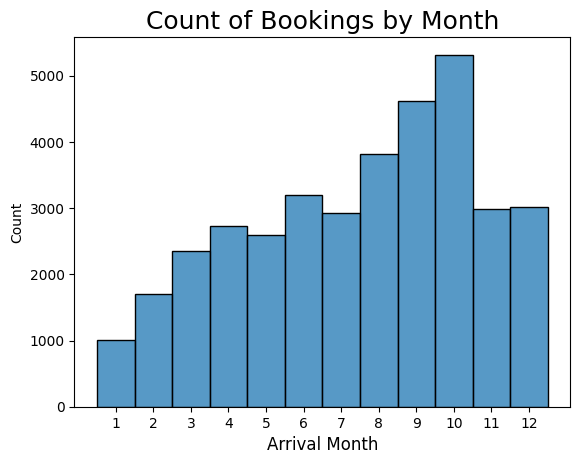

In [9]:
# Creates a Histogram of arrival month
sns.histplot(data = df, x = 'arrival_month', binwidth=1, binrange=(0.5, 12.5))

# Formats the Histogram
plt.title('Count of Bookings by Month', fontsize = 18)
plt.xlabel('Arrival Month', fontsize = 12)
plt.xticks(range(1,13));

2. Which market segment do most of the guests come from?
> a) We can see that online bookings are by far the most common, with offline bookings being second.  The least common type of booking is aviation.

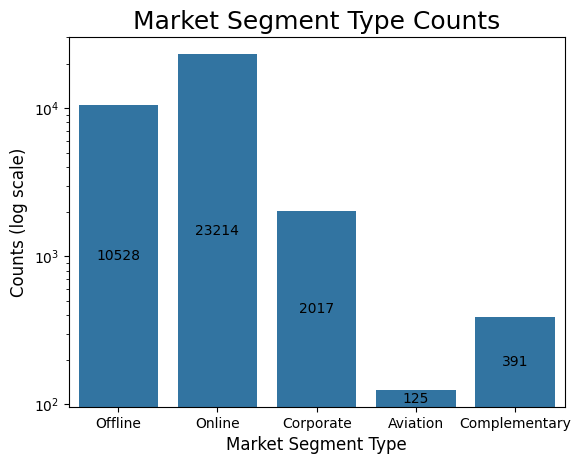

In [10]:
# Creates Count plot for market_segment_type
market_type_plot = sns.countplot(data=df, x = 'market_segment_type')

#Formats Count Plot
plt.title('Market Segment Type Counts', fontsize = 18)
plt.xlabel('Market Segment Type', fontsize = 12)
plt.ylabel('Counts (log scale)', fontsize = 12)
market_type_plot.bar_label(market_type_plot.containers[0], label_type='center') #Adds exact count to bars
plt.yscale('log')

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
> a) We can see the Online orders had the highest median cost per a room, but offline orders had the larges spread.  Most of the complemtry values are 0, but some have non zero values.

market_segment_type
Aviation          95.0
Complementary      0.0
Corporate         79.0
Offline           90.0
Online           107.1
Name: avg_price_per_room, dtype: float64


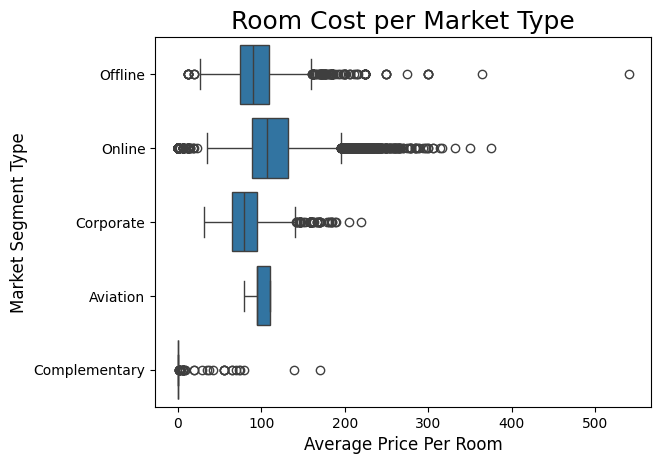

In [11]:
# Prints the median cost per a room by the market segment type
print(df.groupby('market_segment_type')['avg_price_per_room'].median())

# Create Box plot
sns.boxplot(data=df, x = 'avg_price_per_room', y = 'market_segment_type')

# Formats Box Plot
plt.title('Room Cost per Market Type', fontsize=18)
plt.xlabel('Average Price Per Room', fontsize = 12)
plt.ylabel('Market Segment Type', fontsize = 12);

4. What percentage of bookings are canceled?
> a) We see that 11,885 out of 36,275 of the booking were canceled.  This is 32.8% of bookings.

In [12]:
#Prints the number of canceled ant not canceled bookings
df.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
> a) There are 930 total repeat guest out of which only 16 canceled.  This means 1.72% of the the returning guest canceled.

In [13]:
#prints the number of canceled and not canceled bookings for repreat guests
df[df.repeated_guest == 1]['booking_status'].value_counts()

Not_Canceled    914
Canceled         16
Name: booking_status, dtype: int64

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
> a) We can see two clear trends when comparing booking status to the number of special request.  First, the more special requests that are made the higher the percentage that actually show up becomes. Second, over half of the bookings did not make any special request, and each number of request is less common than the one before.

no_of_special_requests  booking_status
0                       Not_Canceled      11232
                        Canceled           8545
1                       Not_Canceled       8670
                        Canceled           2703
2                       Not_Canceled       3727
                        Canceled            637
3                       Not_Canceled        675
4                       Not_Canceled         78
5                       Not_Canceled          8
Name: booking_status, dtype: int64


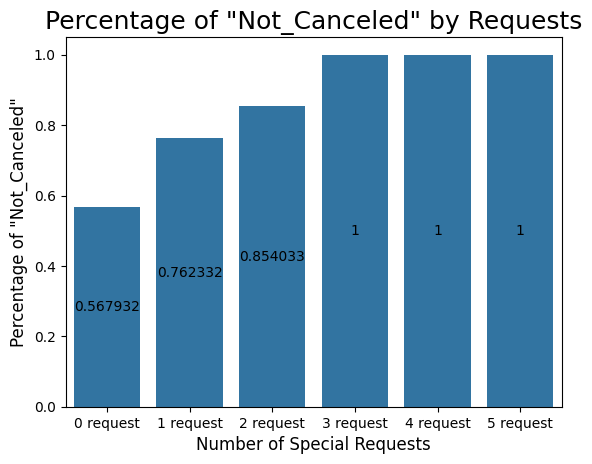

In [14]:
# Prints the counts for booking status by no of special request
print(df.groupby('no_of_special_requests')['booking_status'].value_counts())

# A list to hold the percentage of booking that did not cancel for each value of no_of_special_requests
status_by_request = {}

# Loops through each value of no_of_special_request and records the percentage that did not cancel
for i in np.sort(df.no_of_special_requests.unique()):
  count = df[df.no_of_special_requests==i]['booking_status'].value_counts()
  status_by_request[f"{i} request"] = count[0]/(count.sum())

#Creates a bar plot with the percentages
status_by_request_plot = sns.barplot(x = list(status_by_request.keys()), y = list(status_by_request.values()))

#Formats Bar Plot
status_by_request_plot.bar_label(status_by_request_plot.containers[0], label_type='center') #Adds exact count to bars
plt.title('Percentage of "Not_Canceled" by Requests', fontsize = 18)
plt.xlabel("Number of Special Requests", fontsize = 12)
plt.ylabel('Percentage of "Not_Canceled"', fontsize = 12)
plt.show()


7. Extra data analysis

> a) We can see below that the majority of guest did not require a car parking space.

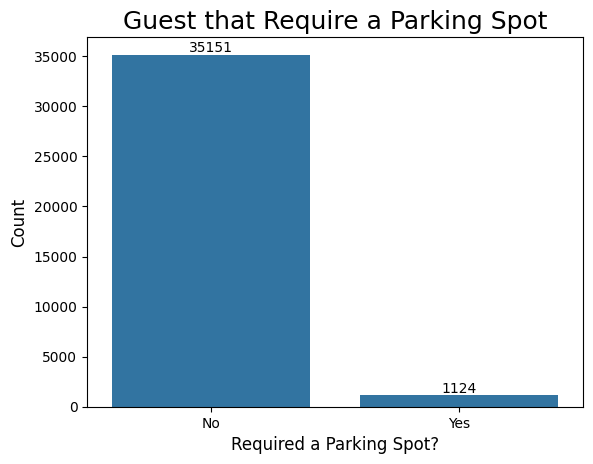

In [15]:
#Creates a countplot for parking
parking_plot = sns.countplot(data=df, x='required_car_parking_space')

#Format countplot
plt.title('Guest that Require a Parking Spot', fontsize = 18)
plt.xlabel('Required a Parking Spot?', fontsize = 12)
plt.xticks([0, 1], ['No', 'Yes'])# Set new xtick labels
plt.ylabel('Count', fontsize = 12)
parking_plot.bar_label(parking_plot.containers[0]); #Adds exact count to bars;

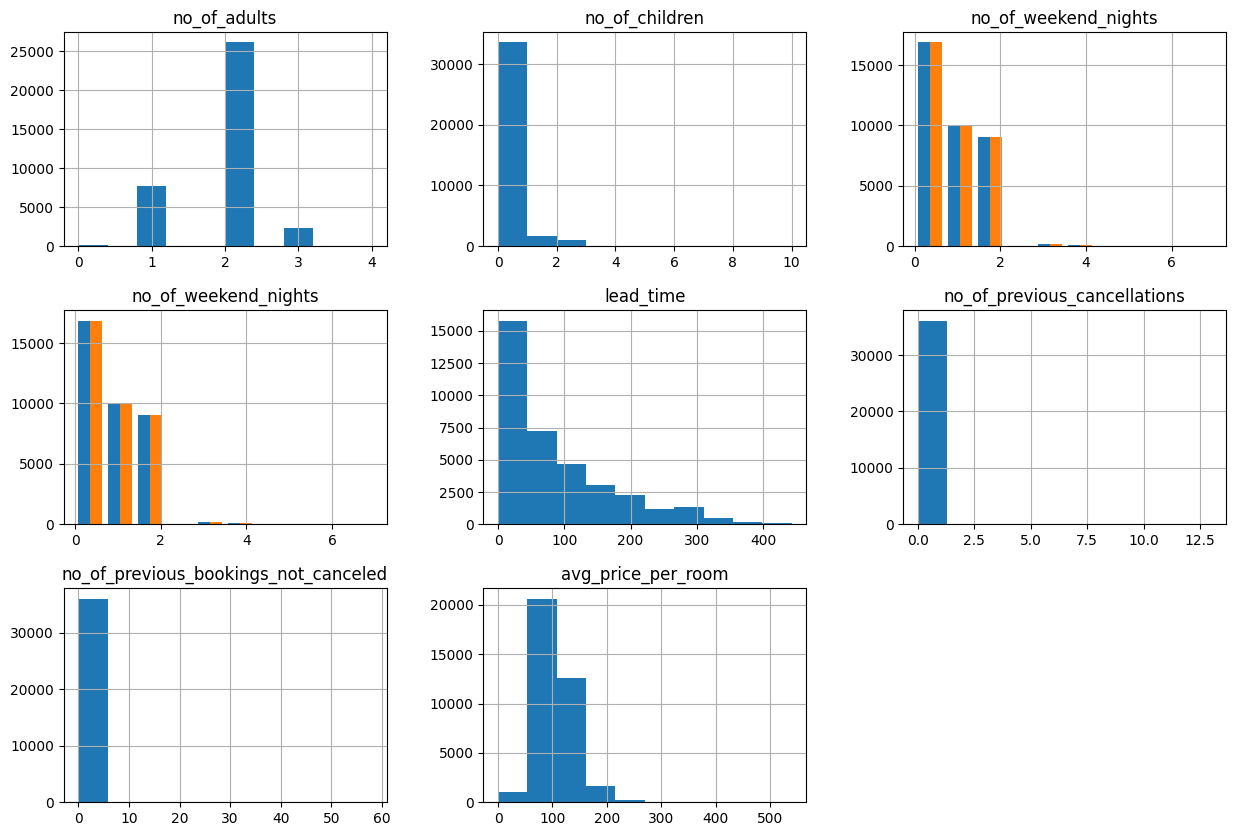

In [16]:
#Creates histagrams for several features
df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_weekend_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room' ]].hist(figsize = (15,10));

> b) We can see below the value counts for all of the catagorical variables. All of these categories should work well for onehot encoding.

In [17]:
#Prints each catagorical variable and the values counts excluding the booking id
for var in df.select_dtypes(include='object').drop('Booking_ID', axis=1):
    print(f'{var}:')
    print(df[var].value_counts())

type_of_meal_plan:
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
room_type_reserved:
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
market_segment_type:
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
booking_status:
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


[Text(0, 0, '11869'), Text(0, 0, '11'), Text(0, 0, '1'), Text(0, 0, '4')]

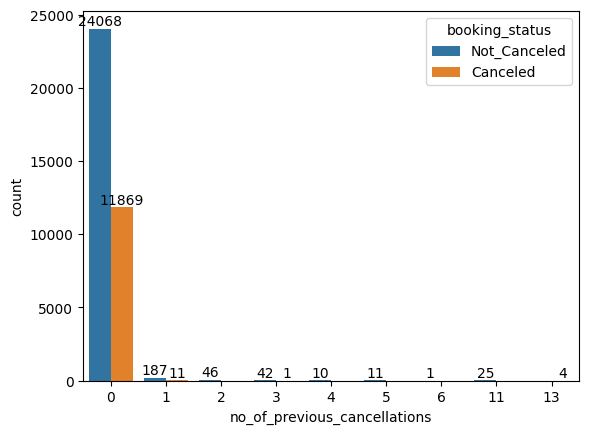

In [18]:
catplot = sns.countplot(data = df, x = 'no_of_previous_cancellations', hue = 'booking_status')

catplot.bar_label(catplot.containers[0])
catplot.bar_label(catplot.containers[1])

##Feature Engineering

In [19]:
df['monthDay'] = df['arrival_month']*100 + df['arrival_date']
df.drop(['arrival_month', 'arrival_date'], axis = 1, inplace = True)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,monthDay
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,Offline,0,0,0,65.00,0,Not_Canceled,1002
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,Online,0,0,0,106.68,1,Not_Canceled,1106
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,Online,0,0,0,60.00,0,Canceled,228
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,Online,0,0,0,100.00,0,Canceled,520
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,Online,0,0,0,94.50,0,Canceled,411


## Data Preprocessing

- Missing value treatment (if needed)
> a) We can see from the data description above that there are no null values.  

- Feature engineering (if needed)
  > a) This has been moved after the train_test_split to avoid data leakage

- Outlier detection and treatment (if needed)
> a) We will create out linear model and check the residuals to see if this is needed.  Outliers do not have an overly strong effect on tree models.

- Preparing data for modeling

In [47]:
#Defines OneHotEncoder
encoder = OneHotEncoder(drop = 'first', sparse_output = False)

df_encoded = df.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], axis = 1)

#Fits and used the encoder to transform data
df_encoded[['no_meal_plan', 'meal_plan2', 'meal_plan3', 'room_type4', 'room_type6', 'room_type2', 'room_type5', 'room_type7', 'room_type3', 'offline_booking', 'corporate_booking', 'complementary_booking', 'aviation_booking', 'not_canceled']] = encoder.fit_transform(df[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']])

#Prints head as a check
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   repeated_guest                        36275 non-null  int64  
 9   no_of_previous_cancellations          36275 non-null  int64  
 10  no_of_previous_bookings_not_canceled  36275 non-null  int64  
 11  avg_price_per_r

In [50]:
#Define X and y
X = df_encoded.drop(['Booking_ID', 'not_canceled'], axis = 1)
y = df_encoded.not_canceled

#Adds constant to X
X = add_constant(X)

#Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2 , random_state= 1)

X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,monthDay,no_of_guests,no_of_nights,no_of_previous_bookings,price_per_guest,no_meal_plan,meal_plan2,meal_plan3,room_type4,room_type6,room_type2,room_type5,room_type7,room_type3,offline_booking,corporate_booking,complementary_booking,aviation_booking
0,1.0,2,0,1,2,0,224,2017,0,0,0,65.00,0,1002,2,3,0,130.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,2,0,2,3,0,5,2018,0,0,0,106.68,1,1106,2,5,0,213.36,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1,0,2,1,0,1,2018,0,0,0,60.00,0,228,1,3,0,60.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,2,0,0,2,0,211,2018,0,0,0,100.00,0,520,2,2,0,200.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,2,0,1,1,0,48,2018,0,0,0,94.50,0,411,2,2,0,189.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

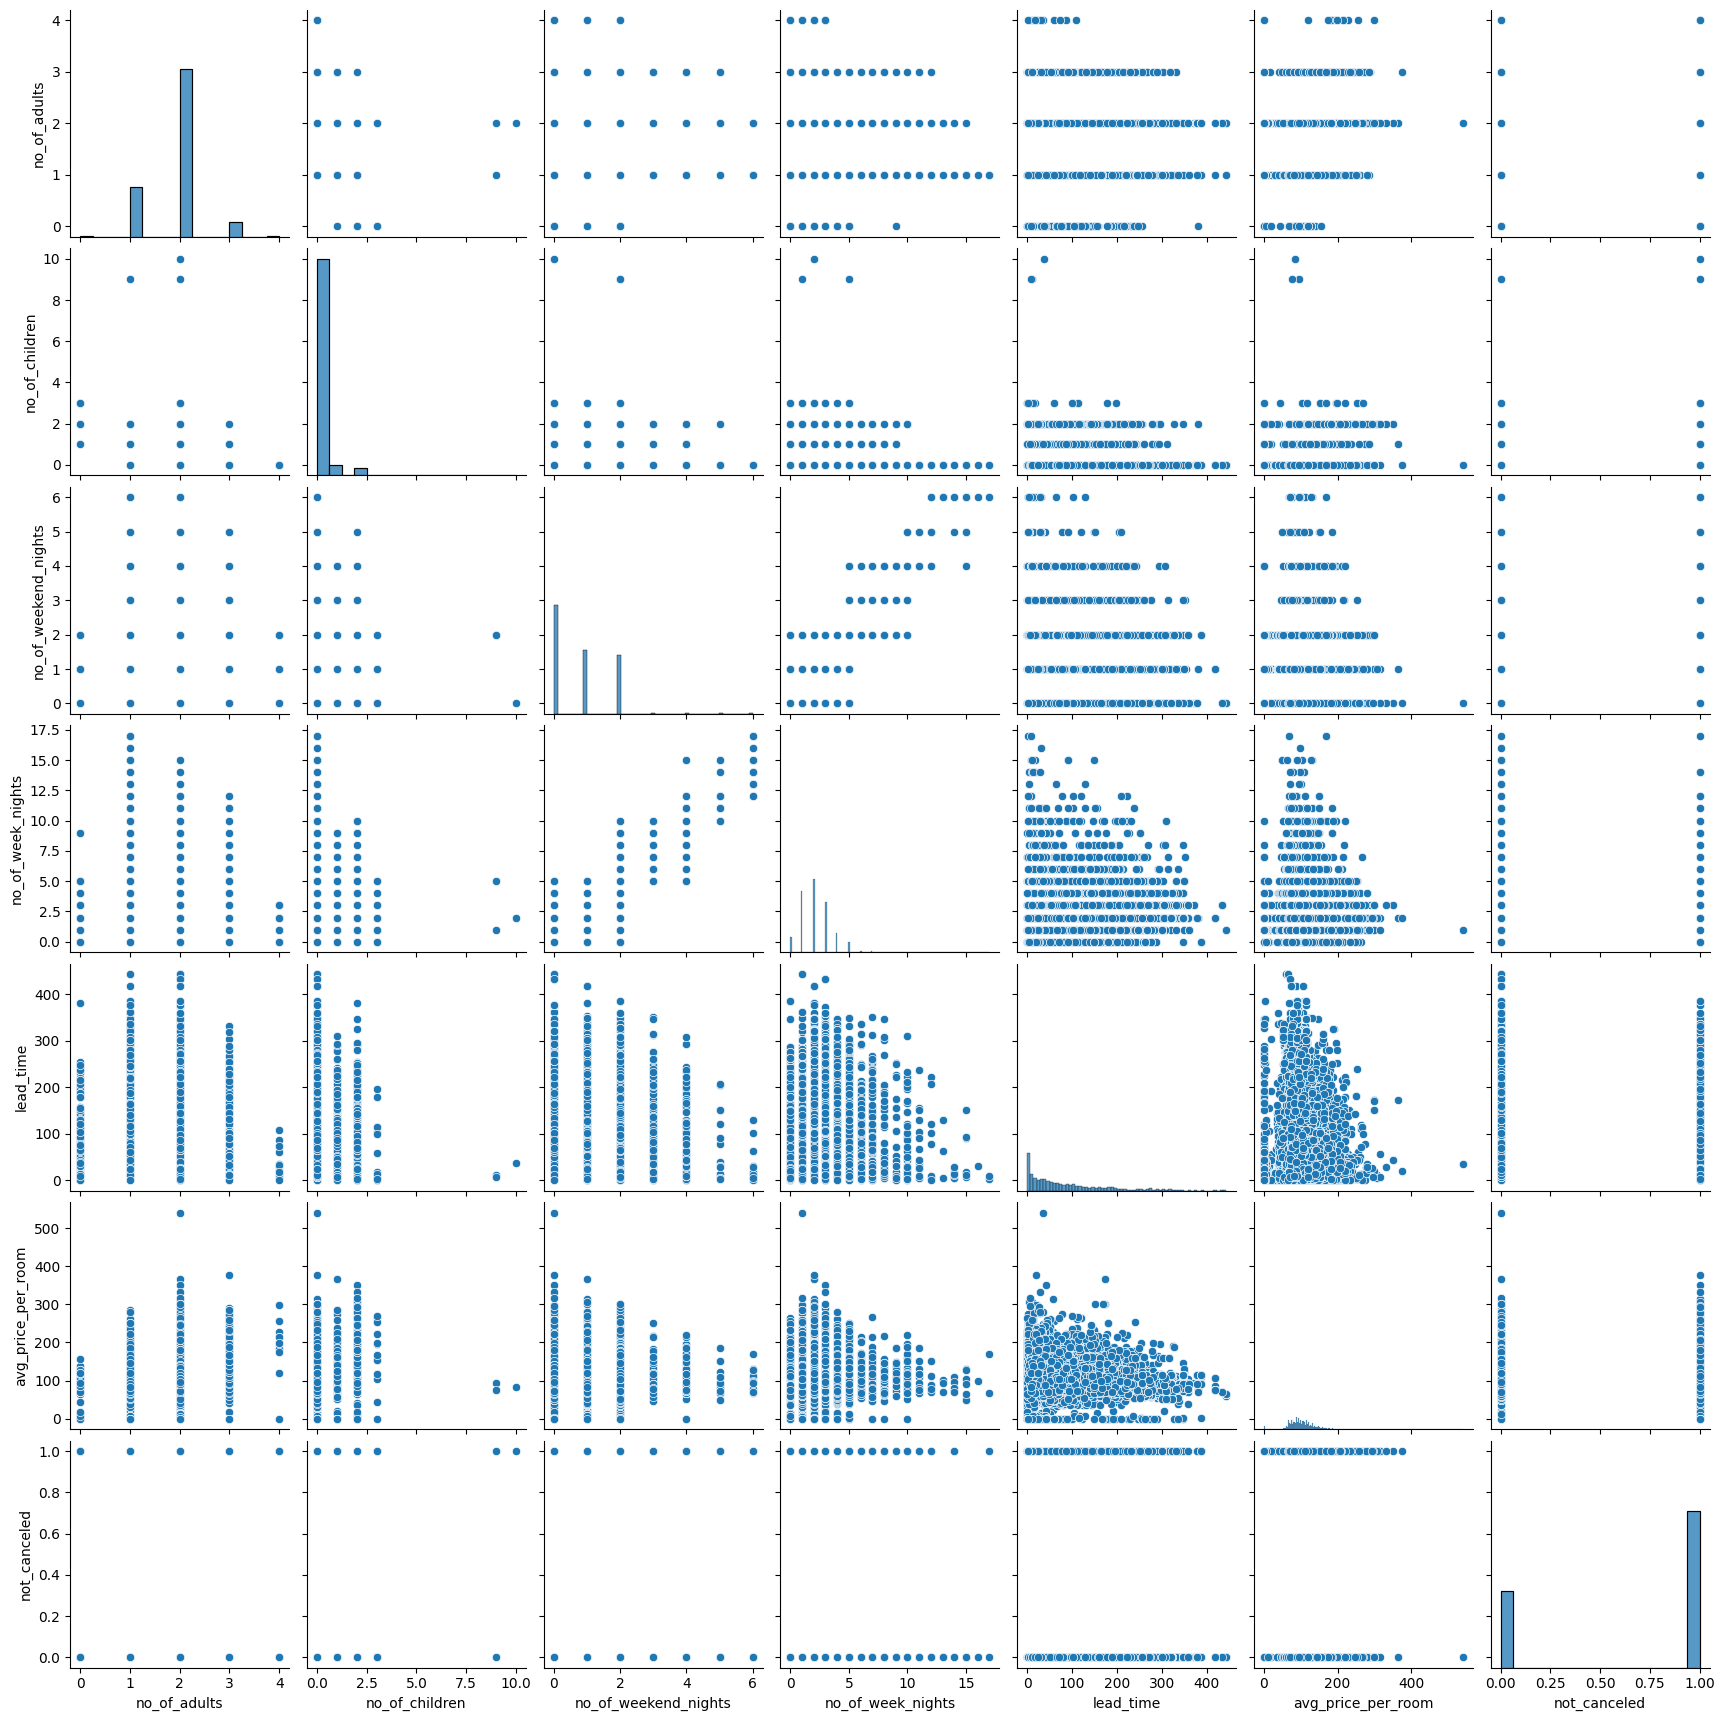

In [52]:
df_train = X_train.copy()
df_train['not_canceled'] = y

sns.pairplot(df_train[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room', 'not_canceled']])


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [53]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF values: 

const                                   3.951144e+07
no_of_adults                                     inf
no_of_children                                   inf
no_of_weekend_nights                             inf
no_of_week_nights                                inf
required_car_parking_space              1.039654e+00
lead_time                               1.392794e+00
arrival_year                            1.429850e+00
repeated_guest                          1.784682e+00
no_of_previous_cancellations                     inf
no_of_previous_bookings_not_canceled             inf
avg_price_per_room                      1.032975e+01
no_of_special_requests                  1.249584e+00
monthDay                                1.274151e+00
no_of_guests                                     inf
no_of_nights                                     inf
no_of_previous_bookings                          inf
price_per_guest                         2.907934e+01
no_meal_plan                    

## Building a Logistic Regression model

In [56]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

         Current function value: 0.422468
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:           not_canceled   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28991
Method:                           MLE   Df Model:                           28
Date:                Wed, 13 Mar 2024   Pseudo R-squ.:                  0.3328
Time:                        11:07:54   Log-Likelihood:                -12260.
converged:                      False   LL-Null:                       -18376.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  958.7839    113.783      8.426      0.000     735.773    1181.794
no_of_adults                            -0.1363      

We can see that when we ran all of our data through the linear model, we failed to converge warning. I believe this is because we have too many columns.  We will drop columns with high p-values one at a time and retrain our model.

In [59]:
#Define X and y
X = df_encoded.drop(['Booking_ID', 'not_canceled', 'meal_plan2', 'room_type6', 'offline_booking', 'aviation_booking', 'no_of_previous_bookings_not_canceled'], axis = 1)
y = df_encoded.not_canceled

#Adds constant to X
X = add_constant(X)

#Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)

# fitting the model on training set
logit = sm.Logit(y_train, X_train)
lg = logit.fit()



pred_test = lg.predict(X_test) > 0.5
pred_test = np.round(pred_test)

pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

print("Accuracy on training set : ", metrics.accuracy_score(y_train, pred_train))
print("Accuracy on test set : ", metrics.accuracy_score(y_test, pred_test))

# let's print the logistic regression summary
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.424206
         Iterations 15
Accuracy on training set :  0.8054840843931486
Accuracy on test set :  0.8058220310949388
                           Logit Regression Results                           
Dep. Variable:           not_canceled   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27182
Method:                           MLE   Df Model:                           23
Date:                Wed, 13 Mar 2024   Pseudo R-squ.:                  0.3297
Time:                        11:08:23   Log-Likelihood:                -11541.
converged:                       True   LL-Null:                       -17217.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

## Model performance evaluation

We will start by checking for multicolinearity.

In [60]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF values: 

const                           3.945570e+07
no_of_adults                             inf
no_of_children                           inf
no_of_weekend_nights                     inf
no_of_week_nights                        inf
required_car_parking_space      1.039785e+00
lead_time                       1.377809e+00
arrival_year                    1.428517e+00
repeated_guest                  1.759642e+00
no_of_previous_cancellations    1.663095e+00
avg_price_per_room              9.630220e+00
no_of_special_requests          1.245431e+00
monthDay                        1.269129e+00
no_of_guests                             inf
no_of_nights                             inf
no_of_previous_bookings         2.024191e+00
price_per_guest                 2.875911e+01
no_meal_plan                    1.264915e+00
meal_plan3                      1.256829e+00
room_type4                      1.106568e+00
room_type2                      1.349051e+00
room_type5                      1.021214e

Next we will check our metrics and confusion matrix.

In [61]:
#Determines the treshold to round up, then rounds each of the values up if True and down if False
pred_test = lg.predict(X_test) > 0.5
pred_test = np.round(pred_test)

#Determines the treshold to round up, then rounds each of the values up if True and down if False
pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

Accuracy on training set :  0.8054840843931486
Precision on training set:  0.8327099451760004
Recall on training set:  0.8891077192406587
F1 on training set:  0.8599851836173139
AOC on training set:  0.7616816741156807


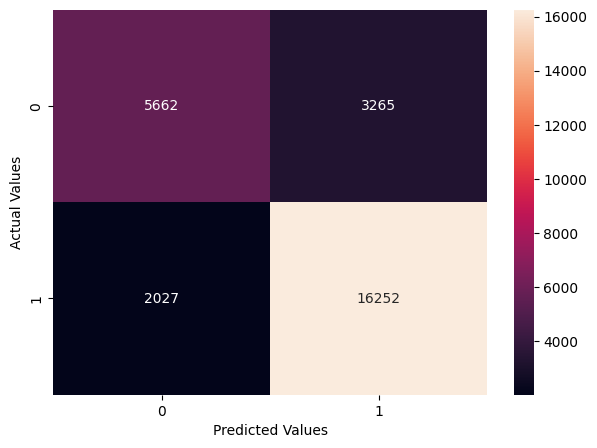

In [62]:
#Prints key metrics for training set
print("Accuracy on training set : ", metrics.accuracy_score(y_train, pred_train)) # % of predictions correct
print("Precision on training set: ", metrics.precision_score(y_train, pred_train)) # % of positive predictions that are correct
print("Recall on training set: ", metrics.recall_score(y_train, pred_train)) # % of positives predicted correctly
print("F1 on training set: ", metrics.f1_score(y_train, pred_train)) # balance of precission and recall
print("AOC on training set: ", metrics.roc_auc_score(y_train, pred_train))

cm = metrics.confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Accuracy on testing set :  0.8058220310949388
Precision on testing set:  0.8324671354325894
Recall on testing set:  0.8911798396334479
F1 on testing set:  0.860823520113807
AOC on testing set:  0.7603296087957638


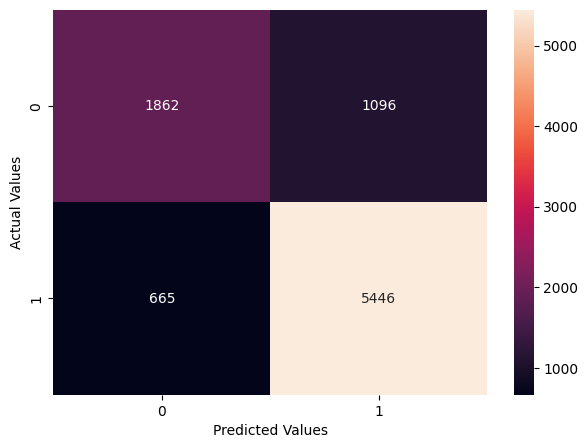

In [63]:
#Prints key metrics for testing set
print("Accuracy on testing set : ", metrics.accuracy_score(y_test, pred_test))
print("Precision on testing set: ", metrics.precision_score(y_test, pred_test))
print("Recall on testing set: ", metrics.recall_score(y_test, pred_test))
print("F1 on testing set: ", metrics.f1_score(y_test, pred_test))
print("AOC on testing set: ", metrics.roc_auc_score(y_test, pred_test))

cm = metrics.confusion_matrix(y_test, pred_test)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

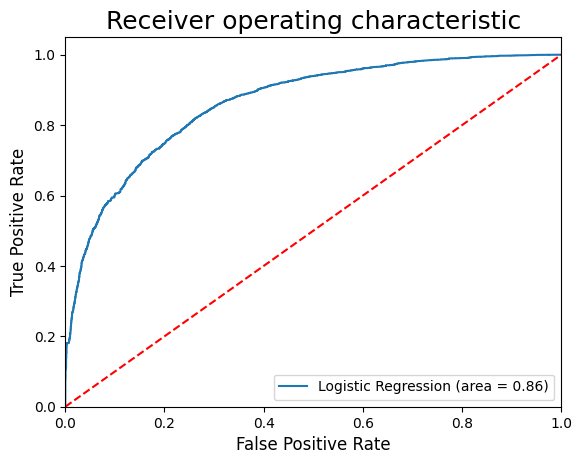

In [64]:
#Recalculates roc_auc_score for training data
logit_roc_auc_train = metrics.roc_auc_score(y_train, lg.predict(X_train))

#Gets values for plot
fpr, tpr, thresholds = metrics.roc_curve(y_train, lg.predict(X_train))

#Creates plot
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)


#Format Plot
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize = 12)
plt.ylabel("True Positive Rate", fontsize = 12)
plt.title("Receiver operating characteristic", fontsize = 18)
plt.legend(loc="lower right");


Percentage change in odds

In [65]:
# finding the percentage change
perc_change_odds = (np.exp(lg.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train.columns, columns=["change_odds%"]).T

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,monthDay,no_of_guests,no_of_nights,no_of_previous_bookings,price_per_guest,no_meal_plan,meal_plan3,room_type4,room_type2,room_type5,room_type7,room_type3,corporate_booking,complementary_booking
change_odds%,inf,-13.325946,-20.014786,-6.381582,1.254529,387.111879,-1.554428,-36.83792,686.644129,-33.354818,-2.643469,340.993682,0.044168,-30.588773,-5.182091,19.889742,0.355427,-16.314505,-24.025438,50.986439,31.642781,121.647992,91.422892,181.629185,109.612333,492.561131


## Final Model Summary

In [66]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:           not_canceled   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27182
Method:                           MLE   Df Model:                           23
Date:                Wed, 13 Mar 2024   Pseudo R-squ.:                  0.3297
Time:                        11:09:08   Log-Likelihood:                -11541.
converged:                       True   LL-Null:                       -17217.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          930.8893    116.916      7.962      0.000     701.738    1160.041
no_of_adults                    -0.1430   2.05e+05  -6.99e-07      1.000   -4

## Building a Decision Tree model

### Feature Engineering

We will start by looking at the data again and preforming some feature engineering that should help our tree.

In [67]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,monthDay,no_of_guests,no_of_nights,no_of_previous_bookings,price_per_guest
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,Offline,0,0,0,65.00,0,Not_Canceled,1002,2,3,0,130.00
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,Online,0,0,0,106.68,1,Not_Canceled,1106,2,5,0,213.36
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,Online,0,0,0,60.00,0,Canceled,228,1,3,0,60.00
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,Online,0,0,0,100.00,0,Canceled,520,2,2,0,200.00
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,Online,0,0,0,94.50,0,Canceled,411,2,2,0,189.00


In [68]:
#Sum of two columns
df['no_of_guests'] = df['no_of_adults'] + df['no_of_children']
df['no_of_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
df['no_of_previous_bookings'] = df['no_of_previous_bookings_not_canceled'] + df['no_of_previous_cancellations']

#Price times number of guests
df['price_per_guest'] = df['avg_price_per_room'] * df['no_of_guests']

### OneHot Encoding

We will use OneHot Encoding for our categorical variables

In [69]:
df_encoded = df.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], axis = 1)

#Fits and used the encoder to transform data
df_encoded[['no_meal_plan', 'meal_plan2', 'meal_plan3', 'room_type4', 'room_type6', 'room_type2', 'room_type5', 'room_type7', 'room_type3', 'offline_booking', 'corporate_booking', 'complementary_booking', 'aviation_booking', 'not_canceled']] = encoder.fit_transform(df[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']])

#Prints head as a check
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   repeated_guest                        36275 non-null  int64  
 9   no_of_previous_cancellations          36275 non-null  int64  
 10  no_of_previous_bookings_not_canceled  36275 non-null  int64  
 11  avg_price_per_r

### Train Test Split

In [100]:
#Define X and y
X = df_encoded.drop(['Booking_ID', 'not_canceled', 'room_type4', 'room_type5', 'no_of_previous_bookings', 'room_type7', 'corporate_booking', 'no_of_previous_bookings_not_canceled', 'repeated_guest','room_type6', 'offline_booking', 'no_of_previous_cancellations', 'meal_plan2', 'room_type3'
                     ], axis = 1)
y = df_encoded.not_canceled

#Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2 , random_state= 1)

#Pritns head
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,avg_price_per_room,no_of_special_requests,monthDay,no_of_guests,no_of_nights,price_per_guest,no_meal_plan,meal_plan3,room_type2,complementary_booking,aviation_booking
0,2,0,1,2,0,224,2017,65.00,0,1002,2,3,130.00,0.0,0.0,0.0,1.0,0.0
1,2,0,2,3,0,5,2018,106.68,1,1106,2,5,213.36,0.0,1.0,0.0,0.0,1.0
2,1,0,2,1,0,1,2018,60.00,0,228,1,3,60.00,0.0,0.0,0.0,0.0,1.0
3,2,0,0,2,0,211,2018,100.00,0,520,2,2,200.00,0.0,0.0,0.0,0.0,1.0
4,2,0,1,1,0,48,2018,94.50,0,411,2,2,189.00,0.0,1.0,0.0,0.0,1.0


### Decision Tree

We will start by creating a defualt tree which will most likly be over fit.  Then we will try pre-pruning and post-pruning the tree to see which one gives a better result.

In [101]:
#Creates our first tree and trains it
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

It is useful to see which features are being used in the tree.  The tree to too complex to print out the whole diagram but this gives us an idea of what is happening.

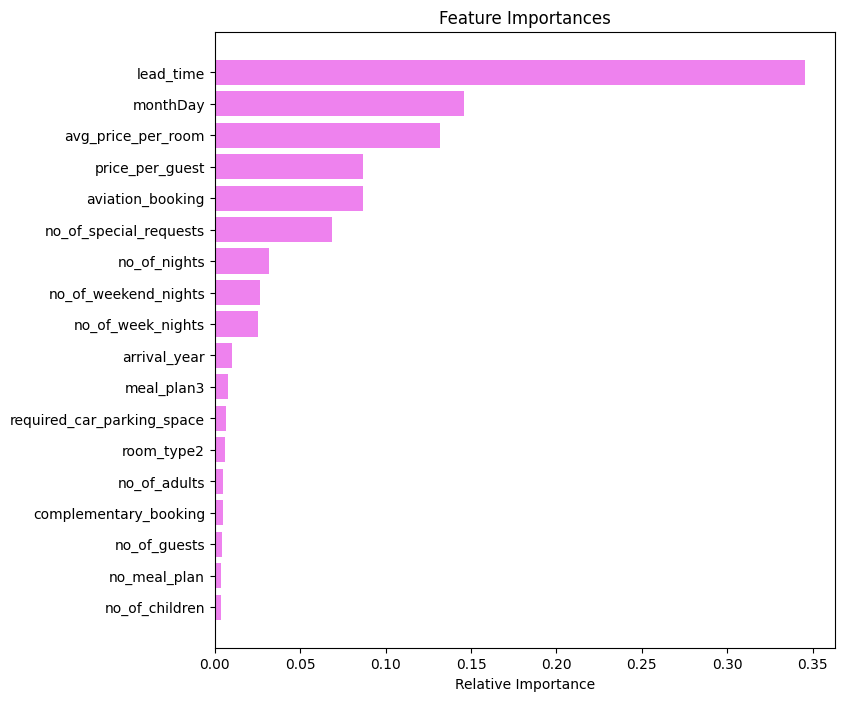

In [110]:
#Creates list of the features used in the model
feature_names = list(X_train.columns)

# importance of features in the tree building
importances = model0.feature_importances_
indices = np.argsort(importances) #sorts y-axis

#Formats Plot
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Do we need to prune the tree?

   Accuracy    Recall  Precision        F1       auc
0  0.993625  0.995124   0.995379  0.995252  0.992844


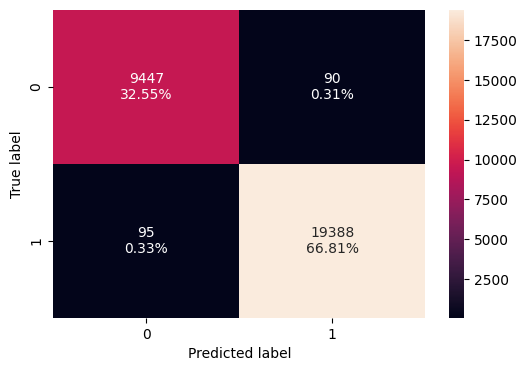

In [103]:
#prints metrics
print(model_performance_classification_sklearn(model0, X_train, y_train))

#Confusion Matrix for training data
confusion_matrix_sklearn(model0, X_train, y_train)

   Accuracy    Recall  Precision        F1       auc
0  0.868642  0.898716   0.906289  0.902486  0.852254


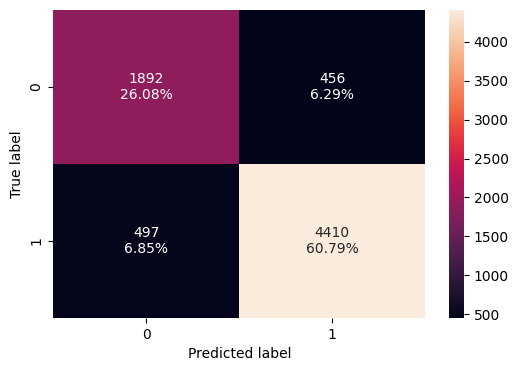

In [104]:
#prints metrics
print(model_performance_classification_sklearn(model0, X_test, y_test))

#Confusion Matrix for testing data
confusion_matrix_sklearn(model0, X_test, y_test)

We can see that our data is overfit since we have an accuarcy of 99% on our training data, but 87% on our testing data.

### Pre-pruning

For pre-pruning we are going to use a random grid search to hypertune the parameters.  

In [105]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(10, 50, 2),
    "max_leaf_nodes": [ 75, 100, 125, 150, 175, 200],
    "min_samples_split": [10, 20, 30, 40, 50, 60, 70],
}

# # Type of scoring used to compare parameter combinations
# acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = RandomizedSearchCV(estimator, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)



DecisionTreeClassifier(criterion='log_loss', max_depth=40, max_leaf_nodes=200,
                       min_samples_split=20, random_state=1)

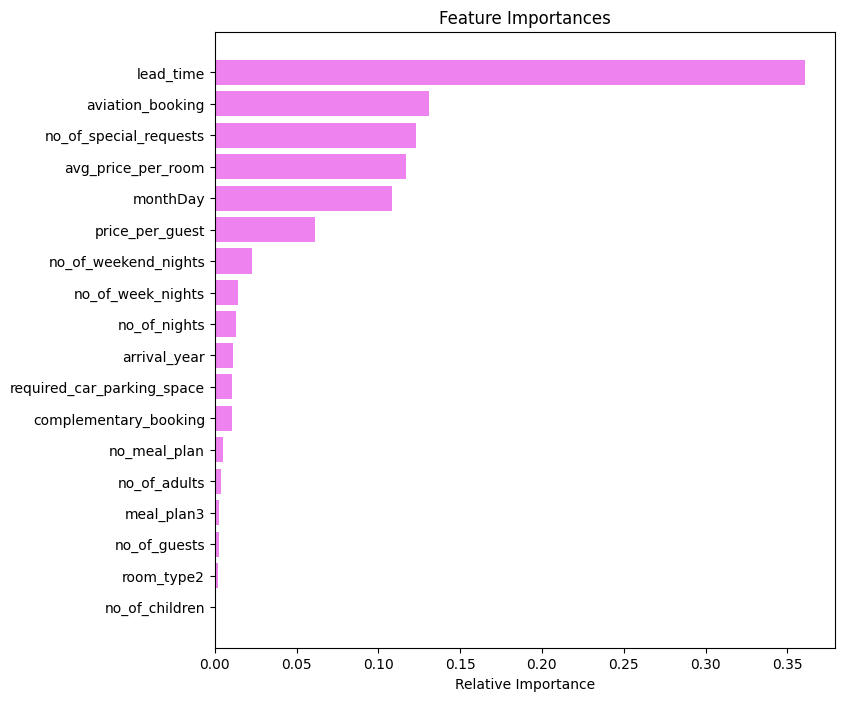

In [112]:
# importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances) #Sorts y-axis

#Formats Plot
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

   Accuracy    Recall  Precision        F1       auc
0  0.884873  0.923677   0.906599  0.915059  0.864638


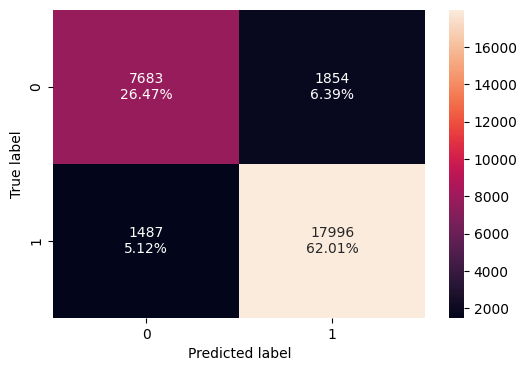

In [107]:
#prints metrics
print(model_performance_classification_sklearn(estimator, X_train, y_train))

#Confusion Matrix for testing data
confusion_matrix_sklearn(estimator, X_train, y_train)

   Accuracy    Recall  Precision        F1       auc
0  0.873467  0.913389   0.900905  0.907104  0.851712


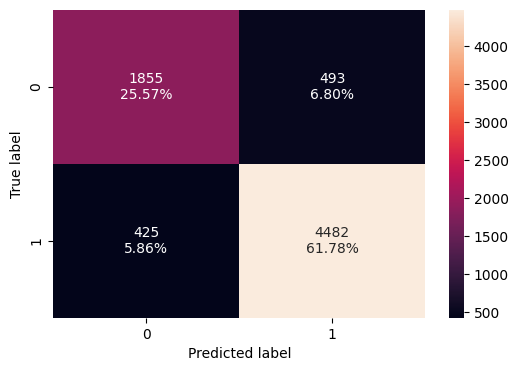

In [108]:
#prints metrics
print(model_performance_classification_sklearn(estimator, X_test, y_test))

#Confusion Matrix for testing data
confusion_matrix_sklearn(estimator, X_test, y_test)

We can see that our training set and testing set have very similar metrics, which means the model is well trained.

### Post-pruning

We will now try post-pruning using cost complexity pruning.  

In [113]:
#Creates the Classifer model
clf = DecisionTreeClassifier(random_state=1)

#Creats a dataframe with different values of alpha and thier impurities
path = clf.cost_complexity_pruning_path(X_train, y_train)
print(pd.DataFrame(path))

#Save alphas and imputities
ccp_alphas = abs(path.ccp_alphas)
impurities = path.impurities

        ccp_alphas  impurities
0     0.000000e+00    0.008243
1     0.000000e+00    0.008243
2     0.000000e+00    0.008243
3     5.609930e-08    0.008243
4     1.640904e-07    0.008243
...            ...         ...
1541  7.447742e-03    0.286047
1542  1.342346e-02    0.299471
1543  1.738421e-02    0.316855
1544  2.384330e-02    0.364541
1545  7.672689e-02    0.441268

[1546 rows x 2 columns]


This first graph shows the impurities for different values of alpha.

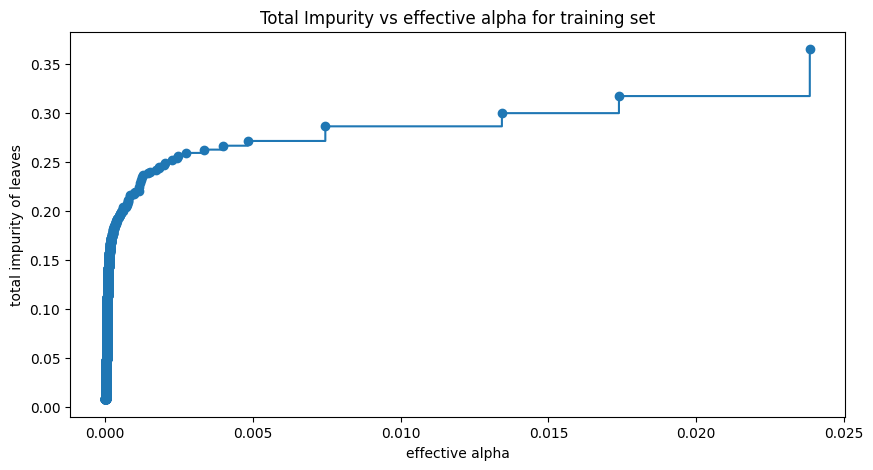

In [114]:
#Sets fig
fig, ax = plt.subplots(figsize=(10, 5))

#Plots alphas and imputities
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

#Formats plot
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

We will now train a model for each alpha value so that we can compare them.

In [115]:
#Empty list to be filled with classifiers
clfs = []

# For each alpha value in our list, this will create a tree
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)

#Prints info about the last tree
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07672689230188368


This allows us to see how the alpha value is affecting the tree's depth and number of nodes.

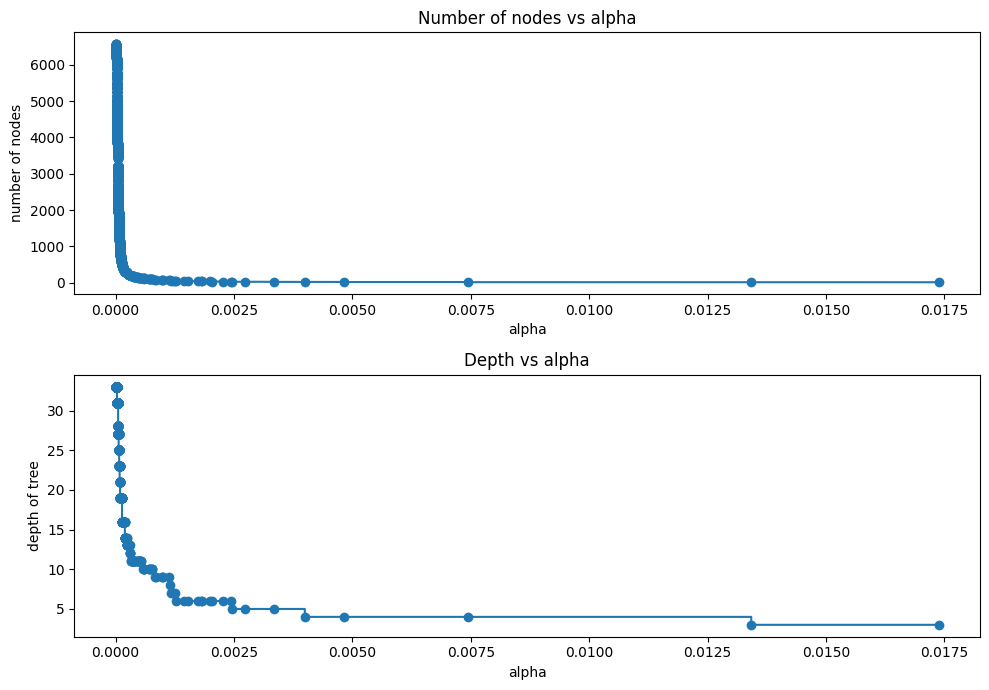

In [117]:
#Drops last tree and alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#Create a list of node counts for each value of alpha
node_counts = [clf.tree_.node_count for clf in clfs]

#Creates a list of depths for each value of alpha
depth = [clf.tree_.max_depth for clf in clfs]

#Set figure with 2 subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

#plots alphas versus node_counts in plot 1
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")

#Formats plot 1
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

#Plots alphas versus depth in plot 2
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")

#formats plot 2
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Now we are going to capture the metrics for the training data and the testing data

In [118]:
#Creates a list to be filled with recall scores from the training set
accuracy_train = []
recall_train = []
precision_train = []
f1_train = []
auc_train = []



#Loops through each classifier
for clf in clfs:
  #Makes predictions with each classifier
  pred_train = clf.predict(X_train)

  #Add metrics to repsective lists
  accuracy_train.append(metrics.accuracy_score(y_train, pred_train))
  recall_train.append(metrics.recall_score(y_train, pred_train))
  precision_train.append(metrics.precision_score(y_train, pred_train))
  f1_train.append(metrics.f1_score(y_train, pred_train))
  auc_train.append(metrics.roc_auc_score(y_train, pred_train))


In [119]:
#Creates a list to be filled with recall scores from the testing set
accuracy_test = []
recall_test = []
precision_test = []
f1_test = []
auc_test = []



#Loops through each classifier
for clf in clfs:
  #Makes predictions with each classifier
  pred_test = clf.predict(X_test)

  #Add metrics to repsective lists
  accuracy_test.append(metrics.accuracy_score(y_test, pred_test))
  recall_test.append(metrics.recall_score(y_test, pred_test))
  precision_test.append(metrics.precision_score(y_test, pred_test))
  f1_test.append(metrics.f1_score(y_test, pred_test))
  auc_test.append(metrics.roc_auc_score(y_test, pred_test))

Now we will look at graphs comparing the testing and training metrics.

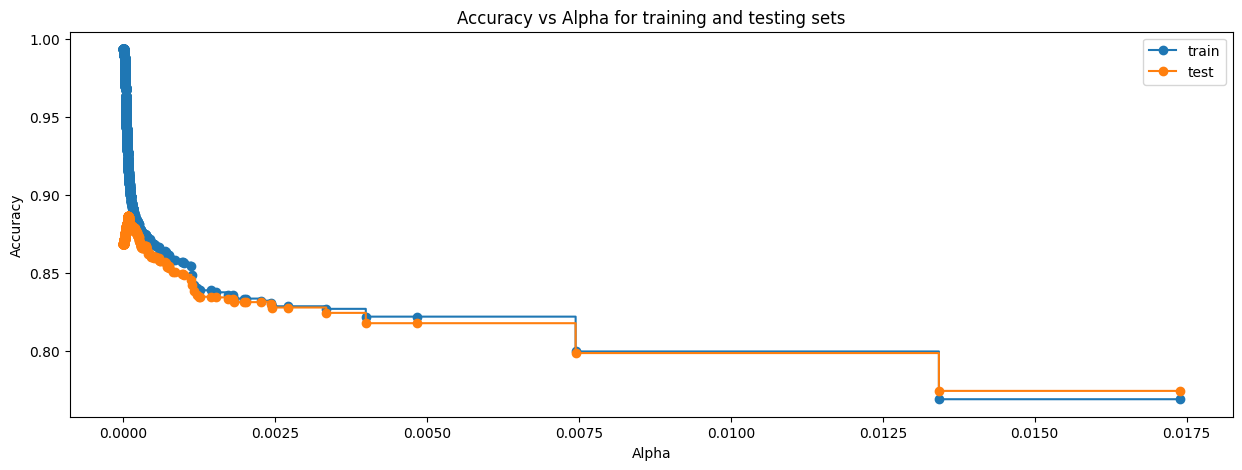

In [120]:
#Creates figure
fig, ax = plt.subplots(figsize=(15, 5))

#Formats labels
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")

#Plot accuracy train and accuracy test versus alpha
ax.plot(
    ccp_alphas, accuracy_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, accuracy_test, marker="o", label="test", drawstyle="steps-post")

#Create legend
ax.legend()
plt.show()

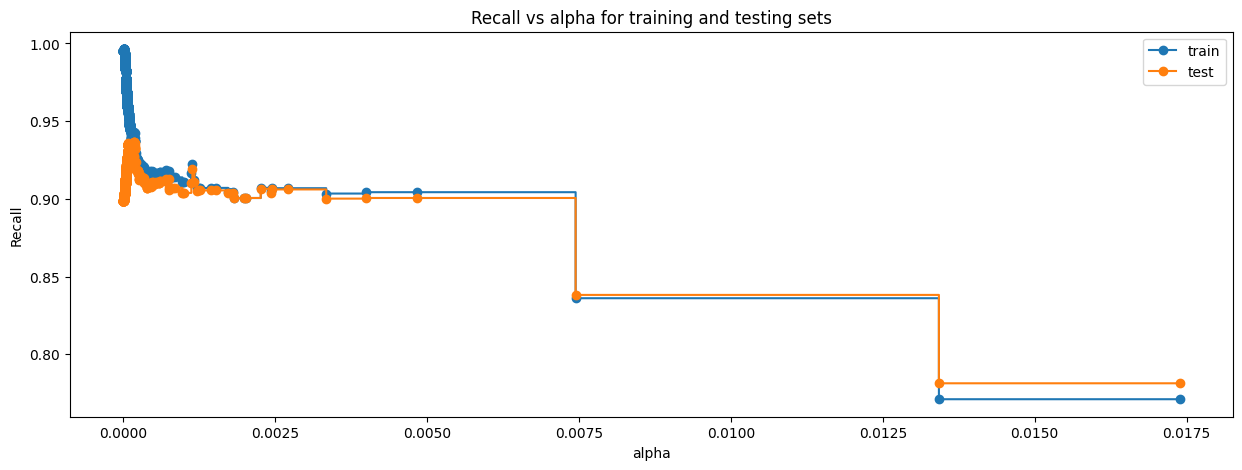

In [121]:
#Creates figure
fig, ax = plt.subplots(figsize=(15, 5))

#Formats labels
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")

#Plot recall train and recall test versus alpha
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")

#Create legend
ax.legend()
plt.show()

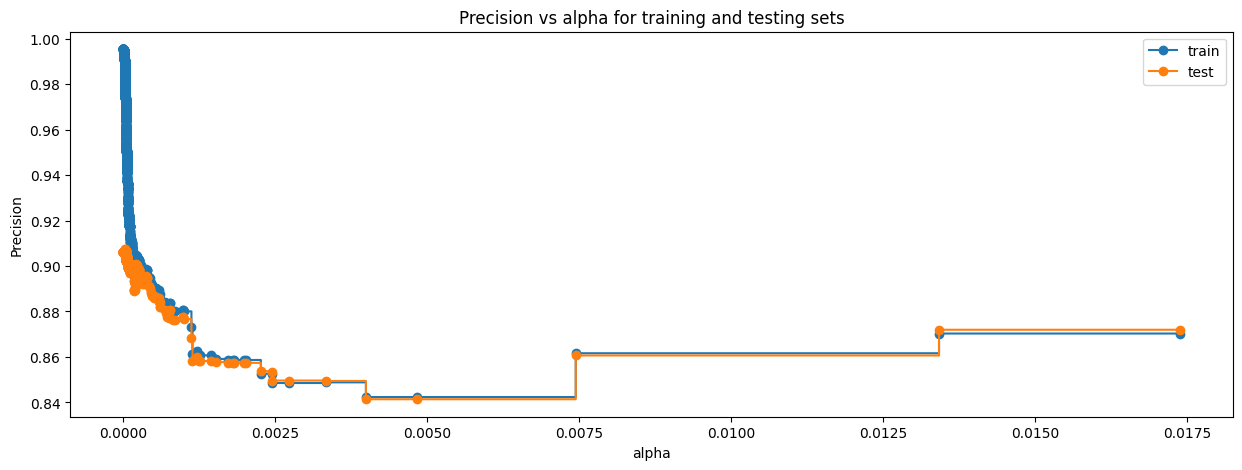

In [122]:
#Creates figure
fig, ax = plt.subplots(figsize=(15, 5))

#Formats labels
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")

#Plot recall train and recall test versus alpha
ax.plot(
    ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")

#Create legend
ax.legend()
plt.show()

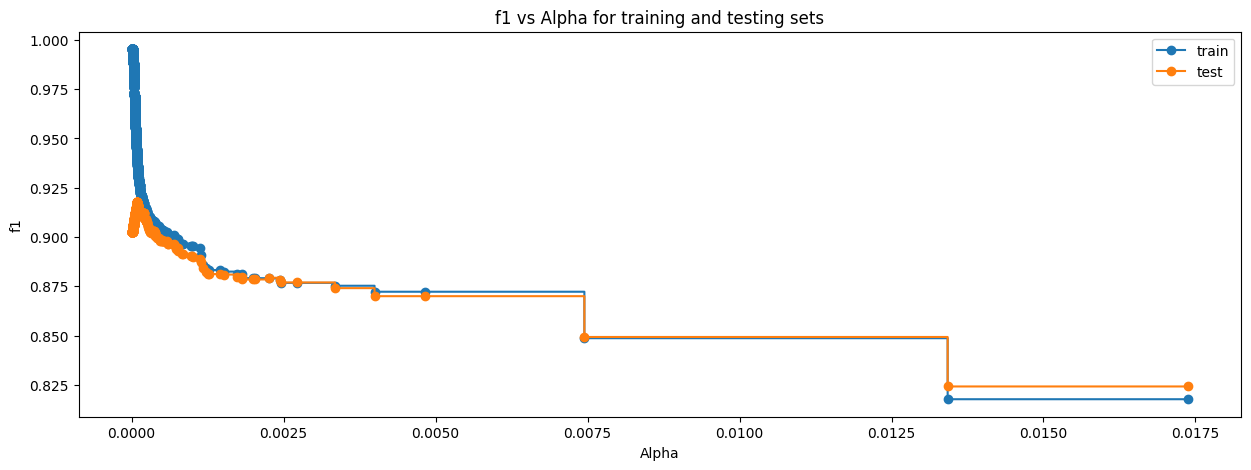

In [123]:
#Creates figure
fig, ax = plt.subplots(figsize=(15, 5))

#Formats labels
ax.set_xlabel("Alpha")
ax.set_ylabel("f1")
ax.set_title("f1 vs Alpha for training and testing sets")

#Plot f1 train and f1 test versus alpha
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")

#Create legend
ax.legend()
plt.show()

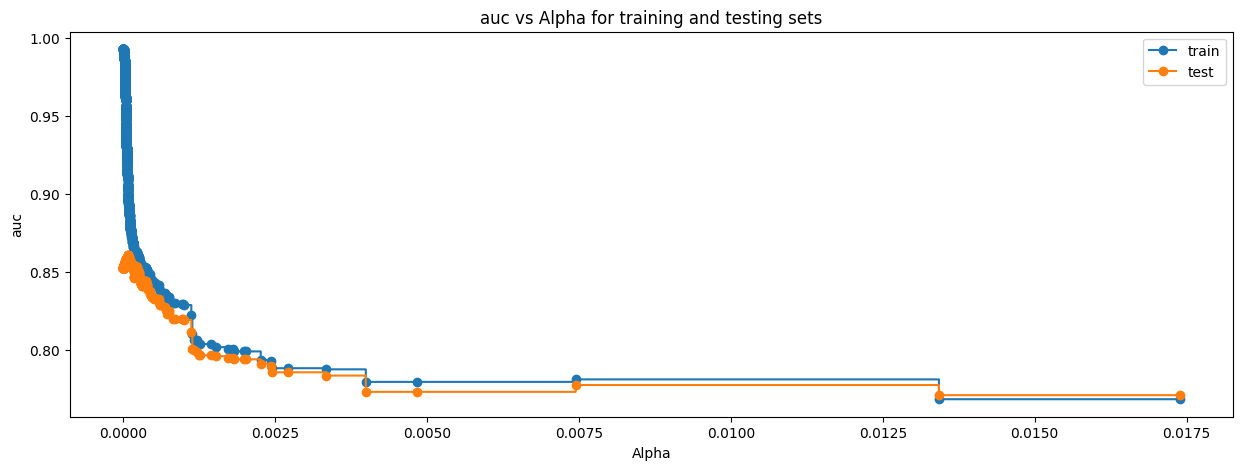

In [124]:
#Creates figure
fig, ax = plt.subplots(figsize=(15, 5))

#Formats labels
ax.set_xlabel("Alpha")
ax.set_ylabel("auc")
ax.set_title("auc vs Alpha for training and testing sets")

#Plot auc train and auc test versus alpha
ax.plot(
    ccp_alphas, auc_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, auc_test, marker="o", label="test", drawstyle="steps-post")

#Create legend
ax.legend()
plt.show()

Now we need to choose which of thes metrics we are going to base our final model on.  

In [133]:
# creating the model where we get highest test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=8.706738548227178e-05, random_state=1)


   Accuracy    Recall  Precision       F1      auc
0  0.917988  0.957758   0.922986  0.94005  0.89725


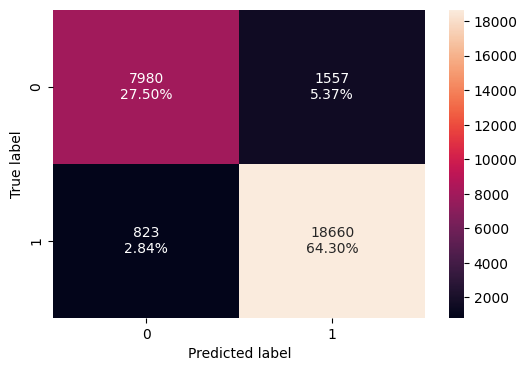

In [134]:
print(model_performance_classification_sklearn(best_model, X_train, y_train))

confusion_matrix_sklearn(best_model, X_train, y_train)

   Accuracy    Recall  Precision        F1       auc
0  0.886699  0.935806   0.900569  0.917849  0.859939


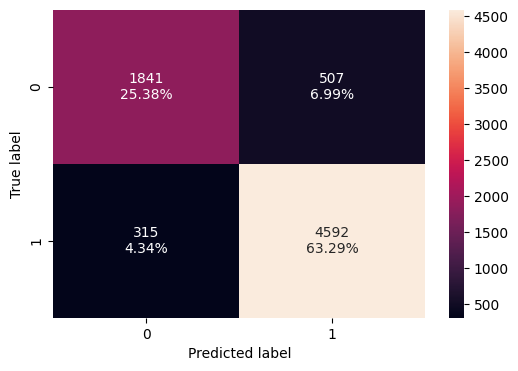

In [135]:
print(model_performance_classification_sklearn(best_model, X_test, y_test))

confusion_matrix_sklearn(best_model, X_test, y_test)

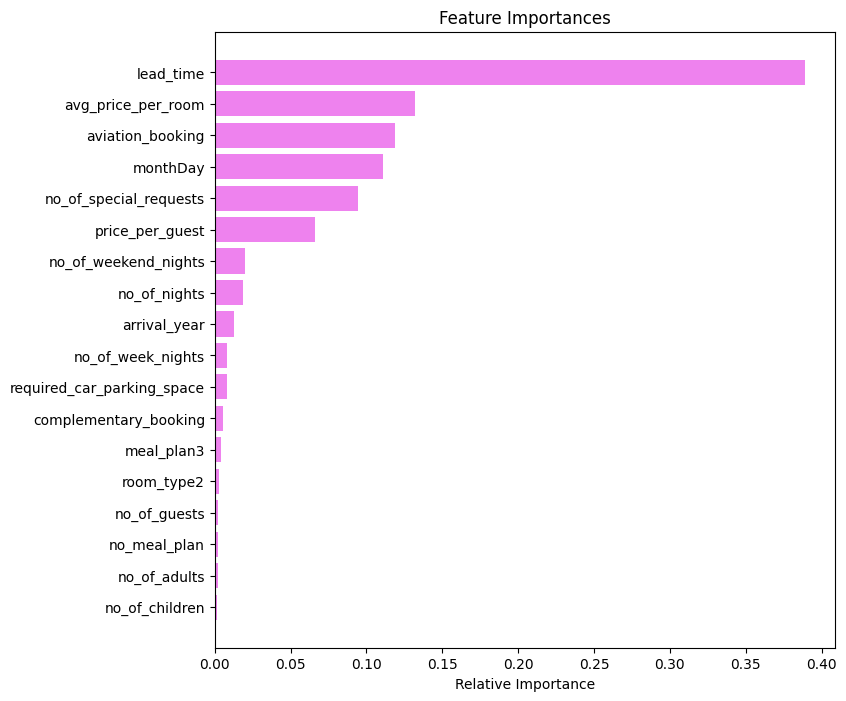

In [136]:
# importance of features in the tree building
importances = best_model.feature_importances_
indices = np.argsort(importances) #Sorts y-axis

#Formats Plot
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<Axes: xlabel='booking_status', ylabel='lead_time'>

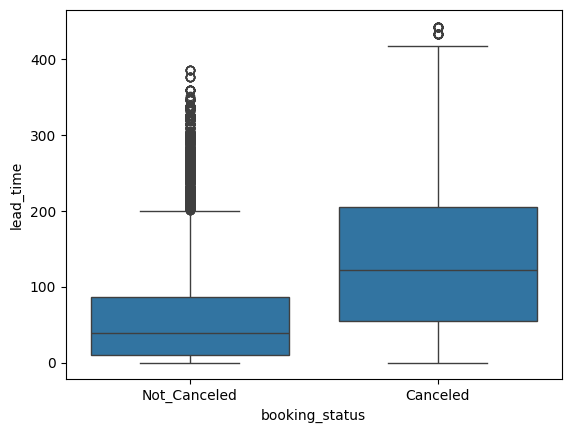

In [138]:
sns.boxplot(data = df, x = 'booking_status', y = 'lead_time')

## Model Performance Comparison and Conclusions

In [137]:
#default model
print('Default Model')
print(model_performance_classification_sklearn(model0, X_test, y_test))

#pre-pruning model
print('Pre-pruning Model')
print(model_performance_classification_sklearn(estimator, X_test, y_test))

# post-pruning model
print('Post-pruning Model')
print(model_performance_classification_sklearn(best_model, X_test, y_test))


Default Model
   Accuracy    Recall  Precision        F1       auc
0  0.868642  0.898716   0.906289  0.902486  0.852254
Pre-pruning Model
   Accuracy    Recall  Precision        F1       auc
0  0.873467  0.913389   0.900905  0.907104  0.851712
Post-pruning Model
   Accuracy    Recall  Precision        F1       auc
0  0.886699  0.935806   0.900569  0.917849  0.859939


The post pruning model preforms slightly better on 4 out of the 5 metircs than the other two models.  I was suprised at how well the default model preformed dispite being over fit.  The defualt model had the highest precision score.

## Actionable Insights and Recommendations



**Model Interpretation**
*   The post-pruning tree model can correctly identify 88.7% of bookings correctly.
* If the post-pruning tree model predicts a guest will not cancel, there is a 90.1% chance the guest will not cancel.
* If the post-pruning tree model predicts a guest will cancel, there is a 85.4% chance that the guest will cancel.  



**Recommendations**
* If the hotel is expecting to be at capacity, then I would suggest the hotel turn down the guest who are predicted to cancel.
* If the hotel plans to continue using this model, they should continue to collect more data, and retrain the model at a regular interval.
* The hotel should add a binary column to indicate whether the booking stays over a holiday.  



In [139]:
# Downloads file a an html
!jupyter nbconvert --to html Project_SLC_DSBA_INNHotels_FullCode.ipynb

[NbConvertApp] Converting notebook Project_SLC_DSBA_INNHotels_FullCode.ipynb to html
[NbConvertApp] Writing 2423206 bytes to Project_SLC_DSBA_INNHotels_FullCode.html
